# Chapter 3: From Baseline to Brilliance

## 3.1. The Role of Cross-Validation and Hyperparameter: An Overview

### 3.1.1. Machine Learning as Function Approximation

At its heart, machine learning addresses a fundamental problem: **approximating an unknown function $f$** that maps inputs $x$ (features) to outputs $y$ (targets). This true function $f$ exists over the entire population $P$, but since we only have access to a finite subset of $P$—the dataset $D$—our task is to approximate $f$ with a function $f'$ that operates on $D$ while generalizing well to unseen data. This task transforms into a **search problem**, where we explore a space of candidate functions $\mathcal{F}$ to find the function $f' \in \mathcal{F}$ that optimizes a predefined objective.

### 3.1.2. Learning as Optimization Over the Function Space

The search for the optimal $f'$ is guided by two primary tools:
1. **A Cost Function** ($\mathcal{L}$): This quantifies the error or deviation of $f'$ from $f$. For instance, mean squared error (MSE) in regression tasks or cross-entropy loss in classification tasks.
2. **A Utility Framework**: Often grounded in information theory, this seeks to maximize the "goodness" of $f'$ using principles like maximum likelihood, minimizing entropy, or reducing information loss.

These tools can often be viewed as two sides of one coin yilding equivalent outcome in practice. For example, minimizing the **negative log-likelihood** corresponds to maximizing the likelihood. Or, minimizing **cross-entropy** aligns with maximizing the information gain from predictions.

Hyperparameter tuning and cross-validation operate within this theoretical framework to ensure that the selected $f'$ minimizes the cost function effectively while generalizing well beyond $D$.

### 3.1.3. Hyperparameter Tuning as Searching Strategy

Hyperparameters are not learned from the data directly but control how the model learns, influencing its capacity, bias, variance, and overall performance. Examples include:
- Regularization parameters (e.g., $\lambda$ in Lasso, `C` in Logistic Regression).
- Structural parameters (e.g., `max_depth` in Decision Trees, number of estimators in Random Forest).

The process of hyperparameter tuning can be viewed as **searching the space of hyperparameter configurations** to find the one that minimizes the cost function $\mathcal{L}$. Each hyperparameter configuration defines a unique candidate function $f'_h$ within $\mathcal{F}$:
$$
\mathcal{L}(f'_h, D) = \text{Cost of } f'_h \text{ on the training set.}
$$

The goal is to select the $h^*$ (the optimal hyperparameter configuration) that minimizes $\mathcal{L}$:
$$
h^* = \underset{h}{\text{argmin }} \mathcal{L}(f'_h, D).
$$

However, minimizing $\mathcal{L}$ on the training data alone often leads to overfitting—where $f'_h$ fits $D$ well but fails to generalize to unseen data. This is where cross-validation comes into play.

### 3.1.4. Cross-Validation as a Tool for Estimating Generalization

While hyperparameter tuning searches for the function $f'_h$ that minimizes the cost function on $D$, cross-validation ensures that this function generalizes to the broader population $P$. It achieves this by splitting the training data into subsets and testing the model on unseen folds. This process mimics the behavior of $f'_h$ on unseen data and provides a robust estimate of its generalization error.

#### 3.1.4.1. Cross-Validation and the Bias-Variance Trade-Off
- A function $f'_h$ with a low training cost $\mathcal{L}(f'_h, D)$ may overfit, resulting in high variance and poor generalization.
- Cross-validation helps detect overfitting by evaluating the model’s performance on data it hasn’t seen during training. This balances the trade-off between bias (underfitting) and variance (overfitting), guiding the selection of $f'_h$ that generalizes best.

- **Final Hold-Out Validation**:
   After selecting the optimal hyperparameter configuration $h^*$, the hold-out test set provides an unbiased final estimate of the chosen $f'_h$’s performance, verifying that the model generalizes effectively beyond both the training and cross-validation splits.

### 3.1.4.2. Types of Cross-Validation for EMNIST

Here we shortly mention a few methods of cross validating models. 

1. **Hold-Out Validation**:  
   In hold-out validation, the dataset is split into two subsets: one for training and one for testing. While simple and computationally efficient, its primary drawback is that performance estimates can be sensitive to the specific split of the data. However, for this project, we leverage hold-out validation effectively by reserving the testing set for the **final evaluation stage** after hyperparameter tuning is complete. This ensures that the test set remains completely unseen during the model training and tuning processes, providing an unbiased estimate of model performance.

2. **K-Fold Cross-Validation**:  
   K-Fold Cross-Validation divides the training portion of the dataset into `k` equally sized folds. Cycling through all folds, the model is trained on `k-1` folds and tested on the remaining fold. For EMNIST, where the dataset is balanced across classes, this method is suitable and provide higher confidence in performance estimates without requiring class balancing. We shall use K-Fold Cross-Validation alongside **GridSearchCV** to explore hyperparameter combinations and evaluate models' performance.

3. **Stratified K-Fold Cross-Validation**:  
   Similar to K-Fold, but each fold preserves the class distribution of the original dataset. While this is beneficial for imbalanced datasets, it offers no significant advantage for EMNIST since the dataset is already balanced. Hence for our projec regular K-Fold is sufficient.

4. **Leave-One-Out Cross-Validation (LOOCV)**:  
   LOOCV evaluates the model by using each data point as the test set once while training on the remaining data. This method is essentially useful for small dataset where K-fold-baased method practically do not work well. On large or mid-sized datasets such as EMNIST, LOOCV is extremely computationally expensive which makes it impractical for this project.

5. **Time-Series Cross-Validation**:  
   Time-Series CV is specifically designed for sequential data where the training set includes only past data points to predict future points. Since EMNIST is not a time-series dataset, this method does not apply here.


### 3.1.4.3. Cross-Validation and Validation Strategy for EMNIST

In this project, we employ a **two-step validation strategy**:

1. **Hold-Out Validation**:  
   The dataset is initially split into training and testing sets. The **testing set is reserved exclusively for final evaluation** after hyperparameter tuning is complete, ensuring that it remains unseen during model training and parameter optimization. This provides an unbiased estimate of the model's true generalization ability.

2. **K-Fold Cross-Validation with GridSearchCV**:  
   Within the training set, we use **K-Fold Cross-Validation** as part of **GridSearchCV** to tune hyperparameters. This ensures robust performance estimates and helps identify the best parameter combinations for each model without compromising the integrity of the reserved test set.

This strategy balances computational efficiency with reliability, ensuring the final performance evaluation on the hold-out test set reflects the true generalization ability of the models.


### 3.2. Hyperparameter Tuning Strategies: The Exploration vs. Exploitation Paradigm

As discussed above, hyperparameter tuning is fundamentally an optimization problem where the goal is to discover the hyperparameter configuration that minimizes a cost function or maximizes a utility function. The challenge lies in balancing two competing objectives:
- **Exploration**: Sampling hyperparameters from diverse regions of the search space to avoid local minima and gain a broader understanding of the space.
- **Exploitation**: Refining the search around promising regions to identify the optimal configuration efficiently.

### Search Strategies Under the Exploration-Exploitation Framework

#### 1. Grid Search (Maximum Exploitation)  
Grid Search systematically evaluates all possible combinations of hyperparameters in a predefined grid, fully exploiting the specified search space. While it guarantees testing every configuration, it lacks any exploratory mechanism and is computationally inefficient, especially when many hyperparameters contribute minimally to the cost function.

- **Strengths**: Ensures all configurations are tested; best suited for small, constrained spaces.
- **Weaknesses**: Does not prioritize promising regions and wastes resources on irrelevant combinations. Inefficiency arises from redundant evaluations in unimportant regions

#### 2. Random Search (Primarily Exploratory)  
Random Search samples hyperparameter configurations randomly across the defined space, prioritizing exploration over exploitation. It avoids redundant evaluations in structured grids and has a high likelihood of identifying good configurations early in the process.

- **Strengths**: Efficient for large or sparsely structured spaces; explores diverse regions of the hyperparameter space.
- **Weaknesses**: May underexploit promising regions without sufficient iterations. Its randomness can overlook critical areas, especially in highly structured problems.

#### 3. Bayesian Optimization (Balanced Exploration and Exploitation)  
Bayesian Optimization models the objective function probabilistically (e.g., using Gaussian processes) and iteratively refines the search by balancing:
   - **Exploration**: Probing areas of high uncertainty in the model to learn about unexplored regions.
   - **Exploitation**: Focusing on regions likely to yield better performance based on the model's predictions.

This balance is managed through an **acquisition function** (e.g., Expected Improvement, Probability of Improvement), which guides the search to optimize the next evaluation.

- **Strengths**: Adapts dynamically to the search process; balances the trade-off between discovering new regions and refining promising ones.
- **Weaknesses**: Computationally expensive for high-dimensional spaces due to the cost of modeling the objective function.

#### 4. Gradient-Based Optimization (Local Exploitation)  
Gradient-based methods optimize continuous hyperparameters by calculating gradients of the objective function and iteratively updating the parameters. These methods prioritize exploitation by refining configurations around an initial starting point, converging rapidly when the objective function is well-behaved.

- **Strengths**: Highly efficient for optimizing smooth, differentiable functions.
- **Weaknesses**: Poor at exploration and can get stuck in local minima, especially for non-convex functions or poorly initialized starting points.

#### 5. Evolutionary Algorithms (Dynamic Exploration and Exploitation)  
Evolutionary algorithms balance exploration and exploitation through mechanisms inspired by biological evolution:
   - **Exploration**: Achieved through mutation and crossover, which introduce diversity in the population.
   - **Exploitation**: Guided by selection mechanisms that prioritize high-performing configurations.

This dynamic balance makes evolutionary algorithms particularly effective in non-convex, high-dimensional spaces, where traditional methods struggle.

- **Strengths**: Effective for complex, non-convex spaces and mixed parameter types (continuous and discrete).
- **Weaknesses**: Computationally expensive because they require evaluating many generations of configurations and tuning the algorithm’s own hyperparameters.

### Connecting Exploration vs. Exploitation to Practical Hyperparameter Tuning

The choice of strategy reflects the balance needed between exploration and exploitation. Exploration-Dominant strategies,such as Random Search and Evolutionary Algorithms, prioritize exploring the parameter space, which is ideal when the space is large and poorly understood. In contrast, Exploit nhyation-Dominant strategies, such as Grid Search and Gradient-Based Optimization, emphasize refining known regions, suitable for small, well-defined spaces.  Finally, Balanced strategies, including Bayesian Optimization, dynamically balances exploration and exploitation, making it a powerful general-purpose approach for complex problems with constrained computational resources.

### Applications to This Project
In this project, we have chosen **GridSearchCV** for hyperparameter tuning due to its emphasis on finding the **optimal configuration within a predefined grid**. While this approach limits broader exploration compared to RandomSearchCV, the carefully chosen ranges for parameters such as tree depth, learning rate, and regularization strength ensure meaningful coverage of the hyperparameter space. This trade-off aligns with the project's focus on maximizing model performance, and as we will see, the selected models deliver satisfying results which validate our choice.

In the subsequent section, we discuss details of our particular choices for hyperparameters ranges based on specific models. 

## 3.2.1. Helping Functionality For Modularization

> **Note**: The code snippets provided in this section specify the hyperparameter grids and demonstrate the use of `GridSearchCV` for tuning the models. However, the models are not being trained here as they have already been trained using the specified configurations, and saved using `joblib`. The trained models are saved in the `trained_models` directory, located in the parent directory of this EMNIST project. 
>
> We will load these pre-trained models to analyze their performance and error metrics, saving computational time while ensuring reproducibility.

In [89]:
import os
import joblib

def load_models(directory_path):
    """
    load trained models from a specified directory.

    args:
    - directory_path (str): Path to the directory containing the saved models.

    returns:
    - models_dict (dict): Dictionary with model names as keys and loaded models as values.
    """
    models_dict = {}

    # iterate over files in the directory
    for filename in os.listdir(directory_path):
        if filename.startswith("grid_search_") and filename.endswith(".pkl"):
            # extract the model name from the file name
            model_name = filename.replace("grid_search_", "").replace(".pkl", "")
            
            # load the model
            file_path = os.path.join(directory_path, filename)
            with open(file_path, "rb") as file:
                loaded_model = joblib.load(file)
            
            # store the loaded model in the dictionary
            models_dict[model_name] = loaded_model

    return models_dict


directory_path = "./trained_models"
models_dict = load_models(directory_path)

# check loaded content
print("Loaded Models:", models_dict.keys())

def extract_cv_results(models_dict):
    """
    extract cv_results_ from trained GridSearchCV models.

    parameters:
    models_dict (dict): A dictionary where keys are model names and values are trained GridSearchCV models.

    returns:
    dict: A dictionary where keys are model names and values are the cv_results_ from each model.
    """
    cv_results_dict = {}
    for model_name, model in models_dict.items():
        if hasattr(model, 'cv_results_'):
            cv_results_dict[model_name] = model.cv_results_
        else:
            print(f"Warning: Model '{model_name}' does not have 'cv_results_' attribute.")
    return cv_results_dict

cv_results_dict = extract_cv_results(models_dict)

def extract_best_estimators(models_dict=models_dict):
    """
    extract the best estimator from trained GridSearchCV models and create a new dictionary.

    parameters:
    models_dict (dict): A dictionary where keys are model names and values are trained GridSearchCV models.

    returns:
    dict: A dictionary with keys prefixed by "best_" and values being the best estimators from the models.
    """
    # Extract the parameters and their values
    best_estimators_dict = {}
    for model_name, model in models_dict.items():
        if hasattr(model, 'best_estimator_'):
            best_estimators_dict[f"best_{model_name}"] = model.best_estimator_
        else:
            print(f"Warning: Model '{model_name}' does not have 'best_estimator_' attribute.")
    return best_estimators_dict
    
best_estimators_dict = extract_best_estimators(models_dict)

best_estimators_dict.keys()

def evaluate_best_estimators(best_estimators_dict, X_test, y_test):
    """
    evaluate best estimators using the ModelEvaluator class.

    args:
    - best_estimators_dict (dict): A dictionary with model names as keys and trained estimators as values.
    - X_test (ndarray): The input feature data for testing.
    - y_test (ndarray): The true labels corresponding to X_test.

    returns:
    - evaluation_results (dict): A dictionary with model names as keys and evaluation results as values.
    """
    evaluation_results = {}

    for model_name, estimator in best_estimators_dict.items():
        print(f"\nEvaluating {model_name}...")
        evaluator = ModelEvaluator(model=estimator, X_test=X_test, y_test=y_test, model_name=model_name)
        evaluation_results[model_name] = evaluator.evaluate()

    return evaluation_results

tuned_results = evaluate_best_estimators(best_estimators_dict, validation_X_train, validation_y_8)

Loaded Models: dict_keys(['ada', 'sgd', 'exT', 'xgb', 'rf'])

Evaluating best_ada...
Generating predictions for best_ada...

Evaluating best_sgd...
Calibrating best_sgd (SGDClassifier)...
Generating predictions for best_sgd...

Evaluating best_exT...
Generating predictions for best_exT...

Evaluating best_xgb...
Generating predictions for best_xgb...

Evaluating best_rf...
Generating predictions for best_rf...


In [90]:
def generate_comparison_table(baseline_model_name, tuned_model_name, baseline_results, tuned_results):
    """
    generate a summary table comparing the baseline and tuned models' metrics.

    args:
    - baseline_model_name (str): Name of the baseline model in baseline_results.
    - tuned_model_name (str): Name of the tuned model in tuned_results.
    - baseline_results (dict): Dictionary containing baseline model results.
    - tuned_results (dict): Dictionary containing tuned model results.

    returns:
    - pd.DataFrame: Summary table with metrics for the baseline and tuned models.
    """
    # retrieve the results for the specified models
    if baseline_model_name not in baseline_results:
        raise ValueError(f"Baseline model '{baseline_model_name}' not found in baseline_results.")
    if tuned_model_name not in tuned_results:
        raise ValueError(f"Tuned model '{tuned_model_name}' not found in tuned_results.")
    
    # combine the baseline and tuned results into a single dictionary
    comparison_results = {
        f"{baseline_model_name}": baseline_results[baseline_model_name],
        f"{tuned_model_name}": tuned_results[tuned_model_name]
    }

    # generate the summary table
    summary_table = create_summary_table(comparison_results)
    return summary_table

### Notes on the Above Functions

The models discussed in this section have already been tuned using `GridSearchCV` with carefully designed hyperparameter grids. To streamline this discussion and focus on summarizing, visualizations and analyzing the results, we are loading the saved `GridSearchCV` results directly from previously completed training sessions.

We are also providing the code that specifies the hyperparameter grids used for tuning each model and the functionality for running `GridSearchCV`. This allows you to fully understand the tuning process and replicate it if desired, but the actual grid search will not be re-executed here. Instead, we rely on the saved results to extract the best estimators, `cv_results_`, and other evaluation metrics, which will form the basis of our analysis and visualizations.

By combining these precomputed results with the provided code snippets, you gain both the practical understanding of how the models were trained and the ability to reproduce the results independently.

In [ ]:
from sklearn.model_selection import GridSearchCV

def perform_grid_search(estimator, param_grid, X=X_train, y=y_train_8, cv=5, scoring='accuracy', verbose=2, n_jobs=-1):
    """
    perform GridSearchCV for a given model and hyperparameter grid.

    parameters:
    - estimator: The machine learning model to be tuned.
    - param_grid: The dictionary of hyperparameters to search over.
    - X: The training data (features).
    - y: The training labels (target).
    - cv: Number of cross-validation folds. Default is 5.
    - scoring: Scoring metric for evaluation. Default is 'accuracy'.
    - verbose: Level of verbosity for logging. Default is 2.
    - n_jobs: Number of parallel jobs. Default is -1 (use all processors).

    returns:
    - grid_search: The fitted GridSearchCV object.
    """
    grid_search = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        cv=cv,
        scoring=scoring,
        verbose=verbose,
        n_jobs=n_jobs,
        return_train_score=True
    )
    grid_search.fit(X, y)
    return grid_search

### 3.2.2. HalvingGridSearchCV

HalvingGridSearchCV strikes a practical balance between exploration and exploitation while optimizing computational efficiency. It starts with a large number of hyperparameter configurations but evaluates them on a small resource budget (e.g., fewer training samples or shorter epochs). As iterations progress, it eliminates poorly performing configurations and reallocates resources to the more promising ones. This approach ensures that the search space is explored broadly at the outset but focuses computational effort on the most promising configurations as it progresses.

HalvingGridSearchCV would be classified under ***Balanced Exploration and Exploitation*** but with a distinct bias towards ***efficiency***. It starts by broadly exploring the hyperparameter space but iteratively narrows down to a smaller, promising subset of configurations.

#### When to Use HalvingGridSearchCV
HalvingGridSearchCV is particularly suitable for:
- Situations with constrained computational resources, where exhaustive methods like GridSearchCV are infeasible.
- Large hyperparameter spaces where early stopping can reliably indicate poor performance.
- Scenarios requiring an efficient balance between exploration and exploitation without the computational overhead of more advanced techniques like Bayesian Optimization.

#### Our Motivation for Using HalvingGridSearchCV
We realized from the baseline logistic regression's training time that it is highly costly even to train a logistic regression model for a single parameter configuration, let alone a grid range. This cost is even more prohibitive when we observed from the analysis of its precision and recall that the outcome is not worth the expenses incurred. 

To introduce the reader to another hyperparameter tuning technique, we present HalvingGridSearchCV and showcase how it can be used efficiently. However, we will not include the results in our subsequent analysis as they do not align with our focus on more performant models for the problem at hand.

In [ ]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV

def perform_halving_grid_search(estimator, param_grid, X=X_train, y=y_train_8, cv=5, scoring='accuracy', verbose=2, n_jobs=-1, factor=2):
    """
    perform HalvingGridSearchCV for a given model and hyperparameter grid.

    parameters:
    - estimator: The machine learning model to be tuned.
    - param_grid: The dictionary of hyperparameters to search over.
    - X: The training data (features).
    - y: The training labels (target).
    - cv: Number of cross-validation folds. Default is 5.
    - scoring: Scoring metric for evaluation. Default is 'accuracy'.
    - verbose: Level of verbosity for logging. Default is 2.
    - n_jobs: Number of parallel jobs. Default is -1 (use all processors).
    - factor: Factor by which the resource budget is reduced at each iteration. Default is 3.

    returns:
    - halving_search: The fitted HalvingGridSearchCV object.
    """
    halving_search = HalvingGridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        cv=cv,
        scoring=scoring,
        verbose=verbose,
        n_jobs=n_jobs,
        factor=factor,
        return_train_score=True
    )
    
    halving_search.fit(X_train, y_train)
    return halving_search

## 3.2.3. Specification, Training, Evaluation, and Quantitative Analysis of Tuned against Baseline Models

### Hyperparameter Specification for Logistic Regression

In [ ]:
grid_hyperparameters_lg = {
    'penalty': ['l2', 'elasticnet'],
    'C': [0.01, 0.1],
    'solver': ['saga'],
    'tol': [1e-4],
    'max_iter': [300, 600],
    'l1_ratio': [0, 0.3, 0.6]
}

In [ ]:
grid_lg = LogisticRegression()
grid_search_lg = perform_halving_grid_search(estimator=grid_lg,param_grid=grid_hyperparameters_lg, factor=4)

### 3.2.3.1. Hyperparameter Specification for SGD 

In [ ]:
grid_hyperparameters_sgd = {
    'penalty': ['l2', 'elasticnet'],
    'alpha': [0.01, 1],
    'tol': [1e-2],
    'max_iter': [200, 300, 400],
    'l1_ratio': [0.2, 0.4]
}

grid_search_sgd = perform_grid_search(estimator=SGDClassifier(),param_grid=grid_hyperparameters_sgd)

In [87]:
baseline_model_name = "baseline_sgd"
tuned_model_name = "best_sgd"
comparison_table_sgd = generate_comparison_table(baseline_model_name, tuned_model_name, baseline_results, tuned_results)
comparison_table_sgd.set_index('Model', inplace=True)
comparison_table_sgd

,Precision,Recall,F1-Score,Accuracy,ROC AUC
Model,,,,,
baseline_sgd,0.935583,0.305,0.460030,0.9284,0.936408
best_sgd,0.926752,0.291,0.442922,0.9268,0.925389


### 3.2.3.2. Analysis of Hyperparameter Tuning: Misleading Accuracy, Reliable F1-Score

**Accuracy** measures the proportion of correct predictions overall. While it is an intuitive and widely used metric, it has a significant limitation. ***It does not differentiate between the classes***. For imbalanced datasets, where one class significantly outnumbers the other(s), accuracy can remain high even if the model performs poorly on the minority class. This class imbalance means that even a model that predicts "not 8" most of the time will achieve high accuracy by capturing the abundant **true negatives**. In our case, the non-8 digits are nine times more than the digit 8.  However, such a model may fail to correctly classify digit 8, leading to a high number of **false negatives**, which are instances where actual digit 8s are misclassified as "not 8."

This behavior is evident in the case of the **baseline and tuned SGD models** which both exhibit high accuracy (above 92%). Despite their impressive accuracy, the recall for these models is abysmal (~30-35%). This discrepancy arises because the models capture the abundant true negatives effectively but struggle significantly with the positive class (digit 8). From our **baseline error analysis**, we observed that false negatives are high (732 in 1000) indicating that many actual digit 8s are being misclassified as other digits. Unfotunately, the same problem has persisted with the outcome of gridsearch. 

**F1-Score**, on the other hand, provides a more balanced evaluation by combining **precision** and **recall** into a single metric. Its harmonic mean ensures that both precision and recall are equally important. The F1-score reflects the imbalancedness above by yielding scores of ~0.46 for the baseline model and ~0.52 for the tuned model. This score paints a more realistic picture of how the models struggle with classifying the positive class (digit 8). Unlike accuracy, the F1-Score penalizes the model for its poor recall and ensures that both metrics are considered.

#### The Trade-off

The accepted threshold for precision or recall is highly dependent on the business objectives and the domain of application. Low recall or low precision is not inherently "bad"; their importance varies based on the context and associated costs of errors. For example, low recall may be tolerable in domains where false negatives are not critical, such as spam email detection. Missing a few spam emails (false negatives) in a user’s inbox is less harmful than misclassifying important emails as spam (false positives). Conversely, low precision might be acceptable in medical screening for rare diseases. Identifying potential cases (even with false positives) is critical for early diagnosis, as follow-up diagnostic tests can confirm or rule out these cases. 

### 3.2.3.3. Hyperparameter Specification for Random Forest

In [ ]:
grid_hyperparameters_rf = {
    'n_estimators': [50,100],
    'max_depth': [6,9,12],
    'min_samples_split': [6,8,10],
    'max_features': ['sqrt'],
    'min_samples_leaf': [4,6,8]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_rf = RandomForestClassifier(random_state=42)
grid_search_rf = perform_grid_search(estimator=grid_rf,param_grid=grid_hyperparameters_rf)

In [86]:
baseline_model_name = "baseline_rf"
tuned_model_name = "best_rf"
comparison_table_rf = generate_comparison_table(baseline_model_name, tuned_model_name, baseline_results, tuned_results)
comparison_table_rf.set_index('Model', inplace=True)
comparison_table_rf

,Precision,Recall,F1-Score,Accuracy,ROC AUC
Model,,,,,
baseline_rf,0.987365,0.547,0.70399,0.9540,0.986976
best_rf,0.990857,0.867,0.92480,0.9859,0.998330


### 3.2.3.4. Random Forest: Initial Discussion on Recall Improvement

We provide a comparison of the baseline and the best Random Forest estimator in a DataFrame below. One of the most striking observations in the tuned Random Forest model is the substantial improvement in **recall**, which increased from **0.547** in the baseline to **0.867** in the tuned version—a remarkable 30% absolute improvement. While precision remained consistently high (rising slightly from **0.987 to 0.991**), this boost in recall indicates that the model became significantly better at identifying true positives, i.e., digit 8, without sacrificing its ability to avoid false positives.

#### Likely Contributions to the Recall Improvement

1. **Increased Tree Depth (`max_depth`)**: The baseline Random Forest's relatively shallow depth likely limited its ability to capture nuanced patterns in the data, leading to a higher rate of false negatives. Many instances of digit 8 might have been misclassified due to insufficient representational capacity. By allowing trees to grow deeper (`max_depth` $=12$), the tuned Random Forest could model more complex interactions between features. This captures subtle differences that distinguish digit 8 from other classes. This enhanced representational power directly contributes to better recall.

2. **Increased Number of Trees (`n_estimators`)**: With fewer trees, the baseline model had limited diversity in its ensemble, leading to greater variance and a higher likelihood of failing on challenging or ambiguous cases. Doubling the number of trees improved the ensemble's stability, reducing the variance and enabling the model to better generalize to minority class instances. This likely played a significant role in improving recall without negatively affecting precision.

3. **Subtle Changes in Splitting Criteria (`min_samples_split` and `min_samples_leaf`)**: Reduced `min_samples_split` (8 → 6) and `min_samples_leaf` (6 → 4) likely allowed the model to make finer-grained splits, particularly in regions of the feature space corresponding to digit 8. While these parameters are secondary compared to `max_depth` and `n_estimators`, they likely contributed to improved sensitivity by increasing the granularity of feature interactions captured in the trees.

In [85]:
import pandas as pd

def compare_model_hyperparameters(baseline_key, tuned_key, models_dict, base_estimators_dict):
    """
    compare hyperparameters of a baseline model and its tuned counterpart.
    
    args:
    - baseline_key (str): Key for the baseline model in `models_dict`.
    - tuned_key (str): Key for the tuned model in `base_estimators_dict`.
    - models_dict (dict): Dictionary containing the baseline models.
    - base_estimators_dict (dict): Dictionary containing the tuned models.
    
    returns:
    - pd.DataFrame: DataFrame showing non-default hyperparameters for both models.
    """
    # get the baseline and tuned models
    baseline_model = models[baseline_key]
    tuned_model = best_estimators_dict[tuned_key]
    
    # get the parameters of both models
    baseline_params = baseline_model.get_params()
    tuned_params = tuned_model.get_params()
    
    # filter out default (None or 0) parameters
    baseline_filtered = {k: v for k, v in baseline_params.items() if v not in [None, 0]}
    tuned_filtered = {k: v for k, v in tuned_params.items() if v not in [None, 0]}
    
    # combine into a DataFrame for comparison
    comparison_df = pd.DataFrame({
        "Hyperparameter": list(baseline_filtered.keys()),
        "Baseline Value": list(baseline_filtered.values()),
        "Tuned Value": [tuned_filtered.get(k, "Not Tuned") for k in baseline_filtered.keys()]
    })
    
    return comparison_df

comparison_rf_df = compare_model_hyperparameters("baseline_rf", "best_rf", models_dict, best_estimators_dict)
comparison_rf_df

,Hyperparameter,Baseline Value,Tuned Value
0,bootstrap,True,True
1,criterion,gini,gini
2,max_depth,6,12
3,max_features,sqrt,sqrt
4,min_samples_leaf,6,4
5,min_samples_split,8,6
6,n_estimators,50,100
7,random_state,42,42


#### Future Quantitative Hyperparamter Analysis
Later in this chapter, we will quantitatively analyze the effect of hyperparameters such as `max_depth`, `n_estimators`, and `min_samples_split` across different tree-based models. This detailed exploration will help us better understand their contributions to the observed improvements in performance.

### 3.2.3.5. Hyperparameter Specification for Extreme Trees

In [ ]:
grid_hyperparameters_exT = {
    'n_estimators': [50,100],
    'max_depth': [6,9,12],
    'min_samples_split': [6,8,10],
    'max_features': [0.1],
    'min_samples_leaf': [4,6,8]
}

In [ ]:
grid_exT = ExtraTreesClassifier(random_state=42)

grid_search_exT = perform_grid_search(estimator=grid_exT, param_grid=grid_hyperparameters_exT)

In [88]:
baseline_model_name = "baseline_exT"
tuned_model_name = "best_exT"
comparison_table_exT = generate_comparison_table(baseline_model_name, tuned_model_name, baseline_results, tuned_results)
comparison_table_exT.set_index('Model', inplace=True)
comparison_table_exT

,Precision,Recall,F1-Score,Accuracy,ROC AUC
Model,,,,,
baseline_exT,0.989744,0.386,0.555396,0.9382,0.978817
best_exT,0.991001,0.881,0.932769,0.9873,0.998348


### 3.2.3.6. Analysis of Extreme Trees: Significant Recall Improvement and Insights on Hyperparameters

The tuned Extreme Trees model demonstrates a **remarkable improvement in recall**, increasing from **38.6% to 88.1%**, while maintaining precision above **99%**. This represents a dramatic enhancement in the model's ability to correctly identify digit `8`, a key focus of this binary classification task.

#### Interplay of Hyperparameters and Random Thresholding

The hyperparameter tuning for Extreme Trees introduced notable changes, particularly in `max_depth`, `n_estimators`, and `max_features`. While the increase in `max_depth` (from 6 to 12) and `n_estimators` (from 50 to 100) clearly contributed to the improvement, the change in `max_features` (from `sqrt` ≈ 28 to **0.1** ≈ 84) also stood out as potentially impactful.

To investigate the role of `max_features`, we observed that Random Forest, which lacks the randomized thresholding mechanism of Extreme Trees, achieved a substantial improvement in recall when tuned. However, its improvement was not as pronounced as that of Extreme Trees. Note that other hyperparameters for the random forest and extreme tree best estimators are the same. This raised the question: does the increase in `max_features` explain the disproportionate gain in recall for Extreme Trees?

In [89]:
comparison_exT_df = compare_model_hyperparameters("baseline_exT", "best_exT", models_dict, best_estimators_dict)
comparison_exT_df

,Hyperparameter,Baseline Value,Tuned Value
0,criterion,gini,gini
1,max_depth,6,12
2,max_features,sqrt,0.1
3,min_samples_leaf,6,4
4,min_samples_split,8,6
5,n_estimators,50,100
6,random_state,42,42


#### 3.2.3.7. Comparative Experiment: RF with Extreme Trees' Parameters

To address the above question, we trained a Random Forest using the same hyperparameters as the best Extreme Trees model, including `max_features = 0.1`. The resulting Random Forest showed a similar improvement in recall as when moving from its baseline to its best-tuned configuration. This makes our suspecion about the effect, and if any, the size of such an effect of `max_features` alone as the explanation for the larger gain in recall for Extreme Trees.

The key differentiator might be the **randomized thresholding** mechanism of Extreme Trees, and likely its combined interplay with other hpyerparameters. This randomization likely interacts with the hyperparameter changes, such as the increase in `max_features`, to boost recall more effectively than in Random Forest. Measuring the precise effect of the randomized threshdoling and its combined role requires deep quantitative analysis.

### 3.2.3.8. Hyperparameter Specification for XGBoost

In [ ]:
grid_hyperparameters_xgb = {
    'n_estimators': [50,100],
    'max_depth': [6,9],
    'learning_rate': [0.01, 0.1, 0.5],
    'subsample': [0.5],
    'colsample_bytree':[0.8,0.4],
    'reg_lambda': [1,10]
 }

In [ ]:
grid_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

grid_search_xgb = perform_grid_search(estimator=grid_xgb,param_grid=grid_hyperparameters_xgb)

In [90]:
baseline_model_name = "baseline_xgb"
tuned_model_name = "best_xgb"
comparison_table_xgb = generate_comparison_table(baseline_model_name, tuned_model_name, baseline_results, tuned_results)
comparison_table_xgb.set_index('Model', inplace=True)
comparison_table_xgb

,Precision,Recall,F1-Score,Accuracy,ROC AUC
Model,,,,,
baseline_xgb,0.970684,0.894,0.930765,0.9867,0.997345
best_xgb,0.985567,0.956,0.970558,0.9942,0.999505


### 3.2.3.9. Analysis of XGBoost Results: Baseline vs. Best Tuning

Below we see the DataFrame showing the hypeparamters used for training the baseline and the best estimator. The results from the baseline and best-tuned XGBoost models reveal several noteworthy observations:

#### Key Observations:
1. **Tree-Based Models and Precision:** As seen across all tree-based models, the precision remains high due to their inherent conservativity, which prioritizes avoiding false positives. For XGBoost, this trend persists with precision improving slightly from **97.07% (baseline)** to **98.56% (best-tuned)**.

2. **Significant Recall Improvement:** The recall improves by 10%, jumping from **89.4% (baseline)** to **95.6% (best-tuned)**. This boost is primarily attributed to the **increase in tree depth (from 6 to 9)** and the **doubling of tree numbers (from 50 to 100)**. Both changes allow the model to capture more complex patterns and reduce false negatives, improving its ability to identify digit "8".

3. **Boosting’s Role in Recall Gains:**  
   While the increase in `max_depth` and `n_estimators` contributes significantly to recall improvement, XGBoost's **boosting mechanism** deserves special attention. Boosting iteratively focuses on misclassified samples, enabling XGBoost to excel at recall even in its baseline configuration. This explains why the relative gain in recall for XGBoost is smaller compared to RF and extreme trees—boosting already ensures high recall by addressing hard-to-classify cases. The tuned XGBoost achieves higher precision and recall without requiring as much raw capacity increase in terms of `max_depth` or `n_estimators`.

4. **Impact of Feature Reduction:** A striking observation is the reduction of `colsample_bytree` (the fraction of features considered per tree) from **0.8** in the baseline to **0.4** in the tuned model. Despite this reduction precision improves, indicating no loss of model conservativity. Also recall gains significantly which suggests the model becomes more efficient in its feature utilization. This aligns with earlier **EDA findings** and **pixel analysis**, which showed that approximately 30% of the pixel features contribute most to the classification task. Hence, the reduction to 40% appears to focus the model on relevant features while avoiding noise. Moreover, this observation raises the question again that we asked earlier if the `max_feature` parameter's change has (a) an impactful effect on the recall, and (b) if it does by how much!

5. **Resource Optimization:** By using fewer features, the tuned model achieves higher performance without increasing computational cost disproportionately. This reflects the project's focus on balancing computational efficiency with model performance, optimizing the cost-benefit trade-off.

In [91]:
comparison_xgb_df = compare_model_hyperparameters("baseline_xgb", "best_xgb", models_dict, best_estimators_dict)
comparison_xgb_df.dropna()

,Hyperparameter,Baseline Value,Tuned Value
0,objective,binary:logistic,binary:logistic
1,colsample_bytree,0.8,0.4
2,eval_metric,logloss,logloss
3,learning_rate,0.1,0.5
4,max_depth,6,9
6,n_estimators,50,100
7,random_state,42,42
8,reg_lambda,10,10
9,subsample,0.5,0.5


#### 3.2.3.10. Future Comparisons with Feature Selection Techniques
The use of **random feature sampling** (`colsample_bytree = 0.4`) raises an important question:  
How does random feature selection compare against feature selection techniques based on **importance scores** or other criteria?  
This will be explored in the chapter on feature analysis, where we compare **Randomly selected subsets** (as used in XGBoost tuning), and **Feature importance-based subsets** derived from the analysis of tree-based models. This comparison will provide insights into whether the observed performance gains can be further improved with more informed feature selection methods.

### 3.2.3.11. Hyperparameter Tuning for AdaBoost

In [ ]:
grid_hyperparameters_ada = {
      'n_estimators': [50, 100],
      'learning_rate': [0.1, 0.5, 1],
      'algorithm': ['SAMME']
} 

In [ ]:
base_tree = DecisionTreeClassifier(max_depth=6, max_features=0.6)

grid_ada = AdaBoostClassifier(random_state=42, estimator=base_tree)

grid_search_ada = perform_grid_search(estimator=grid_ada,param_grid=grid_hyperparameters_ada)

In [92]:
baseline_model_name = "baseline_ada"
tuned_model_name = "best_ada"
comparison_table_ada = generate_comparison_table(baseline_model_name, tuned_model_name, baseline_results, tuned_results)
comparison_table_ada.set_index('Model', inplace=True)
comparison_table_ada

,Precision,Recall,F1-Score,Accuracy,ROC AUC
Model,,,,,
baseline_ada,0.981215,0.888,0.932283,0.9871,0.995943
best_ada,0.983623,0.961,0.972180,0.9945,0.999396


#### 3.2.3.12. Analysis of AdaBoost Results: Baseline vs. Best Tuning

### 1. Consistency Across Tree-Based Models

AdaBoost, like Random Forest and Extreme Trees, demonstrates a familiar pattern: increasing n_estimators significantly enhances recall. Doubling the number of trees from 50 to 100 allows the model to iteratively refine its focus on misclassified cases, improving generalization without overfitting. The max_depth of the base decision tree remains at 6, which is consistent with prior observations that moderate tree depth balances performance and overfitting risks.

### 2. The Role of Boosting in Recall Improvement

AdaBoost’s boosting mechanism is a central contributor to its recall improvement. Unlike standalone tree-based models, AdaBoost iteratively adjusts the weights of training instances, assigning higher weights to misclassified samples in each iteration. This strategy ensures that harder-to-classify examples receive increased focus in subsequent training stages.

In the case of digit “8” classification, this mechanism likely enabled AdaBoost to address scenarios where the digit “8” might be confused with other digits like “3” or “6.” By emphasizing these harder cases, the model not only improved its ability to identify “8” but also reduced the overall false negatives, which directly correlates to the observed improvement in recall.

In [93]:
comparison_ada_df = compare_model_hyperparameters("baseline_ada", "best_ada", models_dict, best_estimators_dict)
comparison_ada_df.dropna()

,Hyperparameter,Baseline Value,Tuned Value
0,algorithm,SAMME.R,SAMME
1,estimator__criterion,gini,gini
2,estimator__max_depth,6,6
3,estimator__max_features,sqrt,0.6
4,estimator__min_samples_leaf,6,1
5,estimator__min_samples_split,8,2
6,estimator__splitter,best,best
7,estimator,"DecisionTreeClassifier(max_depth=6, max_featur...","DecisionTreeClassifier(max_depth=6, max_featur..."
8,learning_rate,0.1,1
9,n_estimators,50,100


### 3.2.4. Remark and Insights on Further Hyperparameter Tuning

The first round of hyperparameter tuning, especially for small to mid-sized grids, is unlikely to yield the globally optimal configuration unless a very large parameter range is selected. However, choosing a wide range in the initial round of tuning is often inefficient. A more effective strategy is to start with a small to mid-sized range, analyze the trends, and refine the search space in subsequent rounds. By examining the results of these smaller-scale explorations, we can adaptively narrow or expand hyperparameter ranges and reallocate resources toward the most impactful areas. This iterative refinement process is a cornerstone of effective model optimization.

The rationale for this approach lies in the importance of **resource optimization** and **performance-cost balancing**, which are critical as our resources, including time, computational capacity and finances are limitless. Every effort must be justified in terms of its return on investment. Testing every parameter extensively is impractical, especially when some hyperparameters may have minimal or negligible impact on performance. Here, hypothesis testing becomes a valuable tool:

- **De-prioritizing Ineffective Parameters**: If specific hyperparameters (e.g., `max_features`) are shown to have little or no effect on key metrics like recall or precision, their exploration can be de-prioritized. This allows resources to be focused on hyperparameters with proven impact, such as `max_depth` or `n_estimators`, minimizing unnecessary computations.
  
- **Balancing Performance Gains and Costs**: Some hyperparameters may lead to performance improvements but at a high computational cost. Understanding their **effect size** helps evaluate whether the improvement justifies the added expense, ensuring an optimal balance between resource investment and performance gains.
  
- **Informed Iterative Tuning**: Early insights into the relative importance of hyperparameters guide subsequent tuning iterations. Instead of exploring broad, inefficient grids, the process can target critical parameters more effectively, refining performance in a focused and efficient manner. 

#### Insights for Further Tuning

From our observations, several hypotheses emerge regarding the impact of specific hyperparameters. It is important to note that this hypothesis is specific to the EMNIST dataset and the range of hyperparameters being tuned. We are not speaking about the general effect `max_feature` has on the recall when it comes to the general problem of classification.

- 1.	Max Features Hypothesis:
Initial observations from Random Forest and Extreme Trees suggest that increasing max_features from sqrt to higher values (even up to 0.4) may not significantly impact recall or precision. More specifically, we hypothesize: when max_depth is fixed between 6–9 and n_estimators fixed between 50–100, increasing max_features from sqrt to 0.4 of the total features has no statistically significant effect on recall for Random Forest and Extreme Trees models.

- 2.	Boosting and Feature Utilization:
  Boosting techniques, such as XGBoost and AdaBoost, focus on addressing prediction errors from intermediate models. Consequently, we hypothesize: The change in max_features from sqrt to 0.4 of the total features may result in a greater improvement in recall for boosting models compared to non-boosting models.
 
- 3.	Impact of Depth and Estimators:
We also hypothesize that the effect of increasing max_features from sqrt to 0.4 on recall is smaller in magnitude compared to the effects of increasing max_depth and n_estimators, as measured by their relative effect sizes.

These questions can be answered by leveraging the cv_results_ obtained from hyperparameter tuning. By visualizing performance metrics such as recall and F1-score across different hyperparameter combinations, we aim to shed light on the relative contributions of max_depth, n_estimators, and max_features. This analysis will provide actionable insights for future model optimizations and help refine our understanding of the most impactful hyperparameters for this task.

# 3.3. Performance Analysis for Tuned Models

In [91]:
tuned_results = evaluate_best_estimators(best_estimators_dict, validation_X_train, validation_y_8)

tuned_summary = create_summary_table(tuned_results)

tuned_summary


Evaluating best_ada...
Generating predictions for best_ada...

Evaluating best_sgd...
Calibrating best_sgd (SGDClassifier)...
Generating predictions for best_sgd...

Evaluating best_exT...
Generating predictions for best_exT...

Evaluating best_xgb...
Generating predictions for best_xgb...

Evaluating best_rf...
Generating predictions for best_rf...


,Model,Precision,Recall,F1-Score,Accuracy,ROC AUC
0,best_ada,0.983623,0.961,0.972180,0.9945,0.999396
1,best_sgd,0.917772,0.346,0.502542,0.9315,0.937468
2,best_exT,0.991001,0.881,0.932769,0.9873,0.998348
3,best_xgb,0.985567,0.956,0.970558,0.9942,0.999505
4,best_rf,0.990857,0.867,0.924800,0.9859,0.998330


## 3.3.1. Overview of Best Estimators' Performances

The performance of the best estimators on the EMNIST highlights the following:
                                                                                                                                             - **Tree-Based Models Excel in Precision:** Random Forest and Extreme Trees are delivering excellent precision due to their conservativity. They are effectively minimizing false positives. Boosting methods XGBoost and AdaBoost, while slightly lower in precision, are excelling in **recall**. This makes them ideal for tasks requiring a balanced approach.  
- **Selecting Models Based on Business Objectives:** If the priority is both high recall and precision, **non-boosting methods can be excluded** in favor of boosting models for further tuning. Conversely, if **precision** is the primary concern, Random Forest and Extreme Trees are promising candidates for additional optimization.  
- **Stacking for Balanced Needs:** In cases where precision is critical but maintaining reasonable recall is also essential, stacking models like Random Forest or Extreme Trees with XGBoost or AdaBoost offers a pragmatic solution by leveraging their complementary strengths.  

Lastly, as noted earlier, the consistently high ROC-AUC and Accuracy values across models emphasize the need to carefully interpret these metrics. Their insensitivity to imbalanced datasets obscures the true performance of models along precision and recall. In similar cases to EMNIST, assigning higher reliability to metrics like F1-Score provides a more accurate and balanced assessment of model performance.

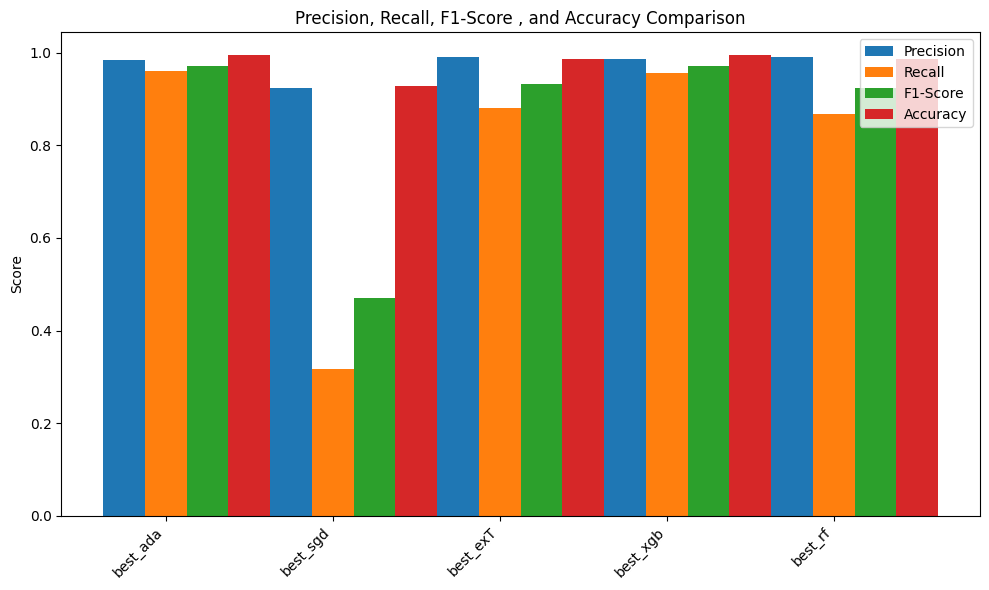

In [106]:
plot_metrics_comparison(tuned_summary)

## 3.3.2. Precision-Recall Curve: A Pareto Efficiency Perspective

One way of perceiving precision-recall is to think of it as a Pareto Efficiency (also called Pareto Optimality) curve, where the two parameters of interest, precision and recall, are plotted against each other to exhibit the range within which both can improve (**Pareto improvement**) until reaching the point (**Pareto Frontier**) where improving one can only come at the cost of degrading the other. 

Before proceeding with this interpretation, it is essential to note that this **Pareto efficiency is specific to the current search space**. Expanding or refining the hyperparameter ranges in future tuning could potentially uncover better Pareto-optimal curves and Pareto frontiers. However, within the hyperparameter ranges used for this project, the estimators found represent the **Pareto-optimal precision-recall trade-offs**, as the grid search approach comprehensively explored the specified space (unlike randomized or halving-based techniques).

### 3.3.2.1. Key Observations

**Pareto Frontier and Top Performers**
   - Models like XGBoost, AdaBoost, and Random Forest lie closer to the ideal corner (top-right) of the plot, effectively balancing precision and recall. These models achieve Pareto efficiency by reaching the frontier within the current hyperparameter search space.
   - In contrast, SGD significantly underperforms, demonstrating poor trade-offs between precision and recall. It remains far from Pareto efficiency, reflecting its limitations in handling this classification problem.

**Steep Decline for Suboptimal Models**
   - The sharp drop in precision for SGD as recall increases reflects the model's inability to maintain confidence while trying to identify more true positives. This is consistent with its poor recall observed in earlier analyses, reinforcing its status as a suboptimal choice for this dataset.

**Superior Boosting Models**
   - Boosting models like XGBoost and AdaBoost exhibit strong performance across a broad range of recall values, maintaining high precision even as recall improves. Their proximity to the Pareto-efficient frontier suggests their ability to effectively balance these trade-offs while handling challenging cases.

### 3.3.2.2. Cost-Benefit Considerations for Further Tuning
- Although further tuning could uncover even better Pareto-efficient curves, it is critical to assess this against **computational cost and resource constraints**. A key consideration is whether the performance gains align with the business objectives. For example, achieving a slight improvement in recall may demand significant additional resources, which might not justify the gains within the context of the business objectives. 
- This evaluation involves weighing the **performance improvement against the cost of tuning**. For instance, while boosting models like XGBoost are already near Pareto efficiency, additional tuning could provide diminishing returns for the effort and resources invested.

### 3.3.2.3. Connecting Theory to Business
- The observed precision-recall curves provide a practical snapshot of the **current Pareto efficiency** for the explored hyperparameter ranges. They reflect how well the models achieve an optimal balance of precision and recall within the defined parameter space.
- These findings emphasize the importance of aligning model optimization strategies with **business objectives**. For scenarios where marginal performance gains are critical and resources are abundant, further exploration may be warranted. However, for many practical applications, the current results demonstrate a strong case for focusing on the top-performing models while ensuring that additional computational resources are allocated judiciously.
- These insights form a critical part of the **Cost-Benefit Analysis** discussion, where we elaborate further on whether additional tuning efforts are justified given the potential performance gains relative to resource expenditure.

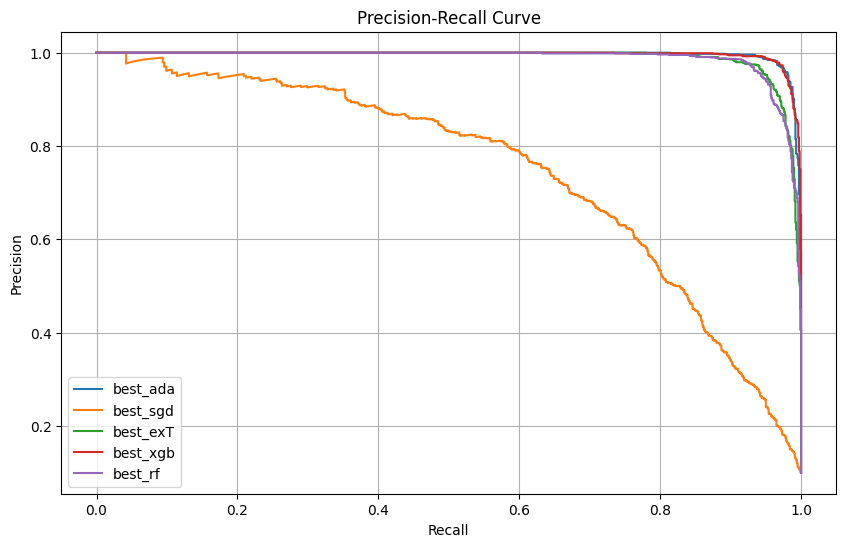

In [95]:
plot_pr_curve(best_estimators_dict, validation_X_train, validation_y_8)

## 3.3.3. Precision-Recall-Threshold Trade-off
The relationship between precision, recall, and threshold is critical in determining an operating point for each model. By adjusting the classification threshold, one can move along the precision-recall curve, essentially making trade-offs to align with business objectives:
- **High Recall Objective**: If false negatives (missed "8"s) are costly, thresholds should be lowered, pushing the model toward the recall axis.
- **High Precision Objective**: For cases where false positives are expensive, thresholds can be raised, prioritizing precision.

This curve also underscores the **importance of calibration**: well-calibrated models like XGBoost make more reliable predictions across a broader range of thresholds, supporting decision-making in varying operational contexts.


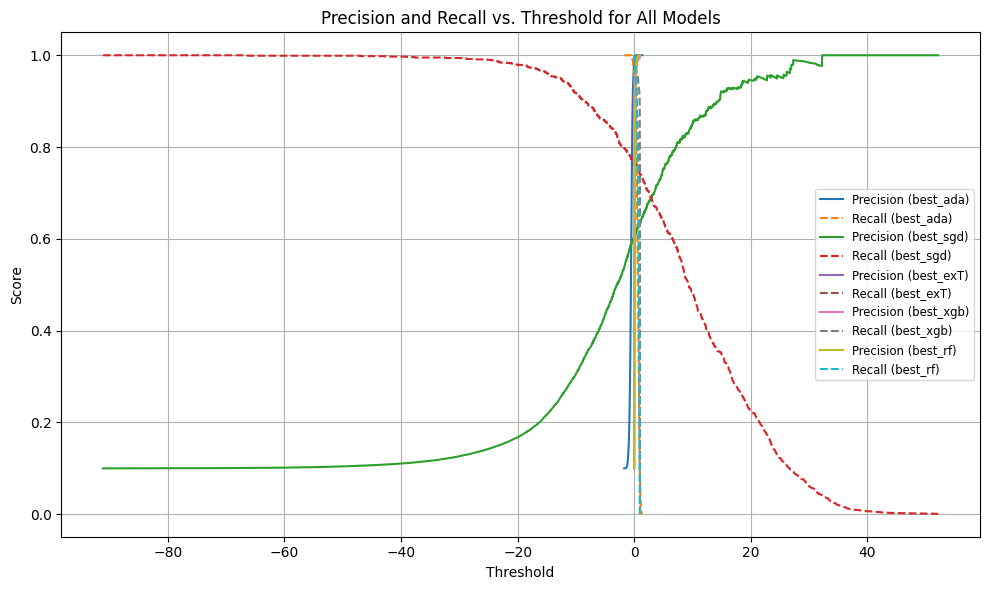

In [96]:
plot_precision_recall_vs_threshold(best_estimators_dict, validation_X_train, validation_y_8)

## 3.3.4. ROC Curve: Trade-off Between Sensitivity and Specificity
The ROC curve for the best estimators demonstrates their ability to distinguish between true positives and false positives across different threshold settings. A few key observations include:

- **Boosting Models and ROC-AUC Excellence**: Models like XGBoost, AdaBoost, and Random Forest achieve near-perfect ROC-AUC scores (approaching 1.00). This indicates their ability to maintain an excellent trade-off between sensitivity (recall) and specificity across various thresholds, signifying robust classification performance.
  
- **Suboptimal Performance of SGD**: The curve for SGD demonstrates a significantly lower ROC-AUC (0.94), reflecting its weaker ability to distinguish between classes effectively. This aligns with its lower recall and overall performance in earlier analyses.

- **Tying to Precision-Recall Trade-offs**: The ROC curve shows how boosting models outperform others in effectively balancing the detection of true positives and minimizing false positives. The tree-based models, while strong in precision, exhibit slightly less pronounced recall which is also reflected in their curve shape.

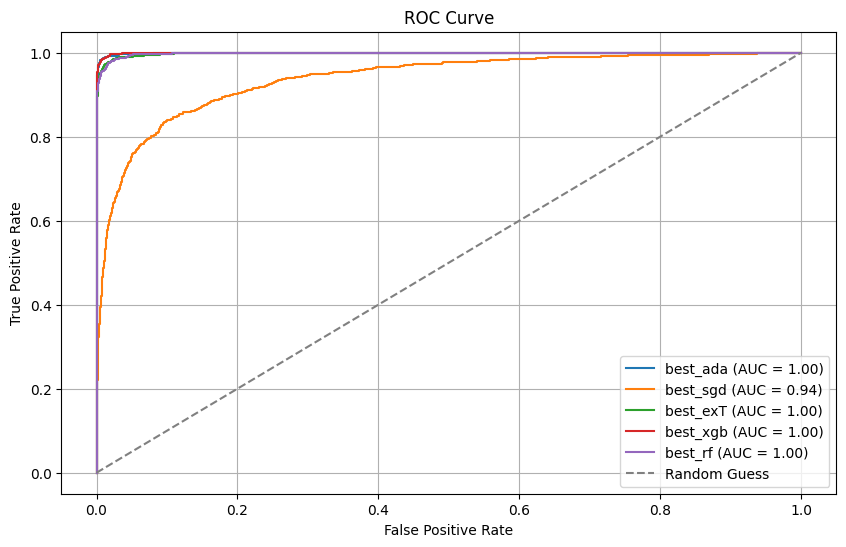

In [97]:
plot_roc_curve(best_estimators_dict, validation_X_train, validation_y_8)

## 3.3.5. F1-Score vs. Threshold: Optimal Decision-Making
The F1-score vs. threshold plot provides a complementary perspective, focusing on the harmonic balance between precision and recall. Important takeaways include:

- **Optimal Thresholds**: Each model achieves its peak F1-score at different thresholds. Boosting models like XGBoost and AdaBoost exhibit high F1-scores near the default threshold of 0.5, reflecting their strong calibration and balanced performance.

- **SGD's Instability**: The F1-score for SGD demonstrates volatility across thresholds, highlighting its lack of reliability in maintaining a consistent balance between precision and recall. This supports our earlier recommendation to deprioritize this model in favor of more robust methods.

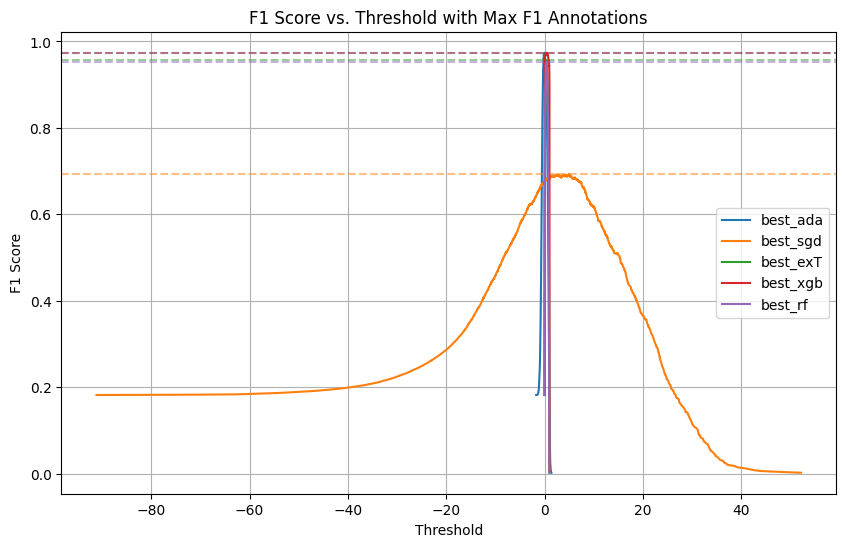

In [98]:
plot_f1_vs_threshold_with_max(best_estimators_dict, validation_X_train, validation_y_8)

# 3.4. Error Analysis

## 3.4.1 Confusion Matrix Analysis: Binary Classification (8 vs. All)

The confusion matrices above confirm and expand upon earlier observations regarding the limitations of metrics like **accuracy** and **ROC-AUC** in imbalanced classification problems. While all models achieve high accuracy (>90%) and ROC-AUC scores, the confusion matrix reveals that this does not equate to reliable performance across **precision** and **recall**. This discrepancy stems from the inherent **imbalancedness of the classification task**: the non-"8" class significantly outnumbers the "8" class, making metrics like accuracy susceptible to bias toward the majority class. The confusion matrices clearly show that some models (e.g., SGD) struggle significantly with recall, even as their precision or accuracy may appear acceptable.

### Guiding Questions for Further Analysis
While the binary confusion matrices provide important insights, they raise additional questions that require deeper exploration:
1. **Which classes are being mistaken for "8"?**  
   For example, are certain digits (e.g., "3" or "6") more frequently confused with "8"? Understanding these misclassifications can reveal areas for model refinement.

2. **What is the nature of the misclassified examples?**  
   Visualizing these samples can help determine whether errors stem from noise, ambiguity in the image data, or limitations in the models themselves.

3. **How do the models compare in class-wise performance?**  
   A class-wise confusion matrix will allow us to examine misclassification trends across all digits, offering a more granular perspective on model behavior.

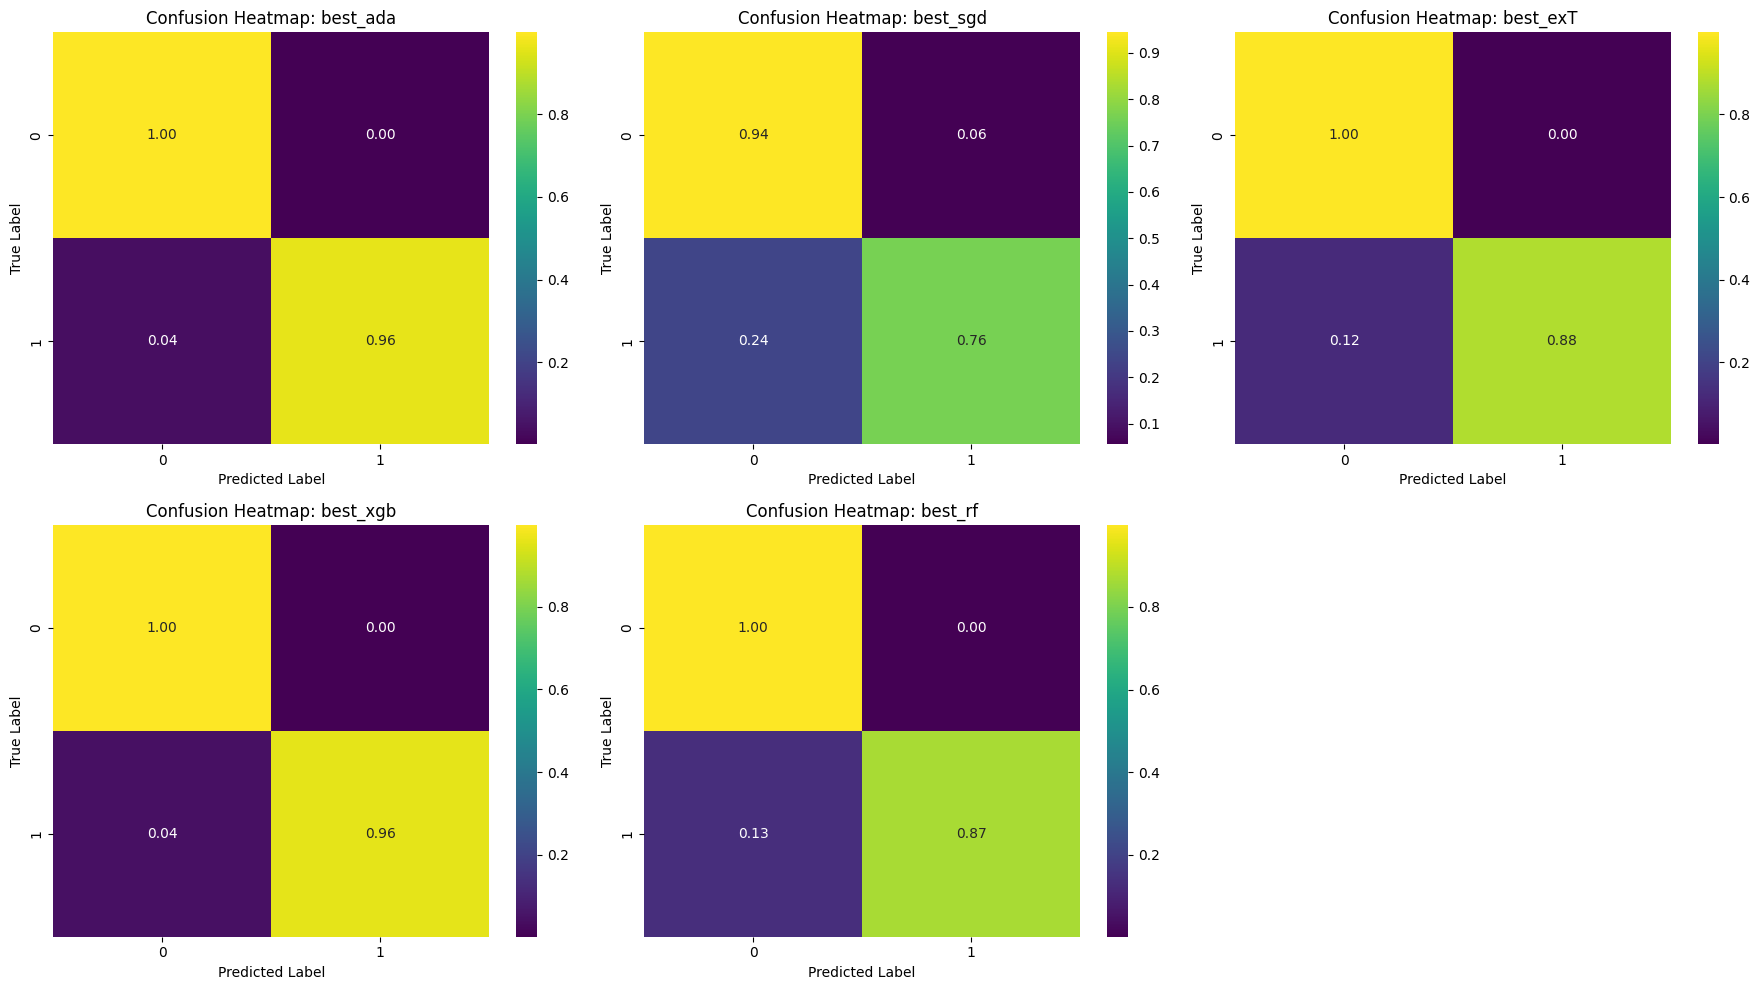

In [99]:
plot_confusion_heatmaps(best_estimators_dict, validation_X_train, validation_y_8)

## 3.4.2. Class-Wise Confusion Matrices Analysis

The heatmaps provided illustrate the class-wise **False Positive (FP)** and **True Negative (TN)** rates for the "8-vs-other digits" classification task. This granular view sheds light on the specific digits the models confuse with "8" and the digits they correctly classify as non-"8". Key observations include:

### 3.4.2.1. False Positive Analysis (FP Heatmaps)
- **AdaBoost:**  It demonstrates a low number of FPs overall, but the majority of its errors stem from digits that bear structural resemblance to "8". Specifically:  
  - **Digit 9:** Its rounded shape and looping structure make it particularly challenging for AdaBoost, contributing to multiple FP errors.  
  - **Digit 3:** The upper and lower loops in "3" can resemble a poorly written "8", further confusing the model.  

- **SGD Classifier:**  The FP counts for SGD are considerably higher, particularly for digits "6" and "9":  
  - **Digit 6:** The bottom loop in "6" can sometimes resemble the lower loop of "8".  
  - **Digit 9:** As seen with AdaBoost, the similar curvature between "9" and "8" leads to frequent misclassification.  
  This reflects the limitations of linear models, as they struggle to capture the nuanced non-linear features that distinguish these digits. 

- **Extreme Trees, Random Forest, and XGBoost:**  These models achieve the lowest FP counts, with XGBoost and Random Forest showing the best performance.  
  - **Digit 3:** Occasional confusion with "8" persists across these models. This is likely due to "3" being visually similar to the top and bottom loops of "8" in poorly written instances.  
  - **Digit 9:** While much less frequent than with AdaBoost or SGD, confusion with "9" still occurs in some cases due to structural overlap.  

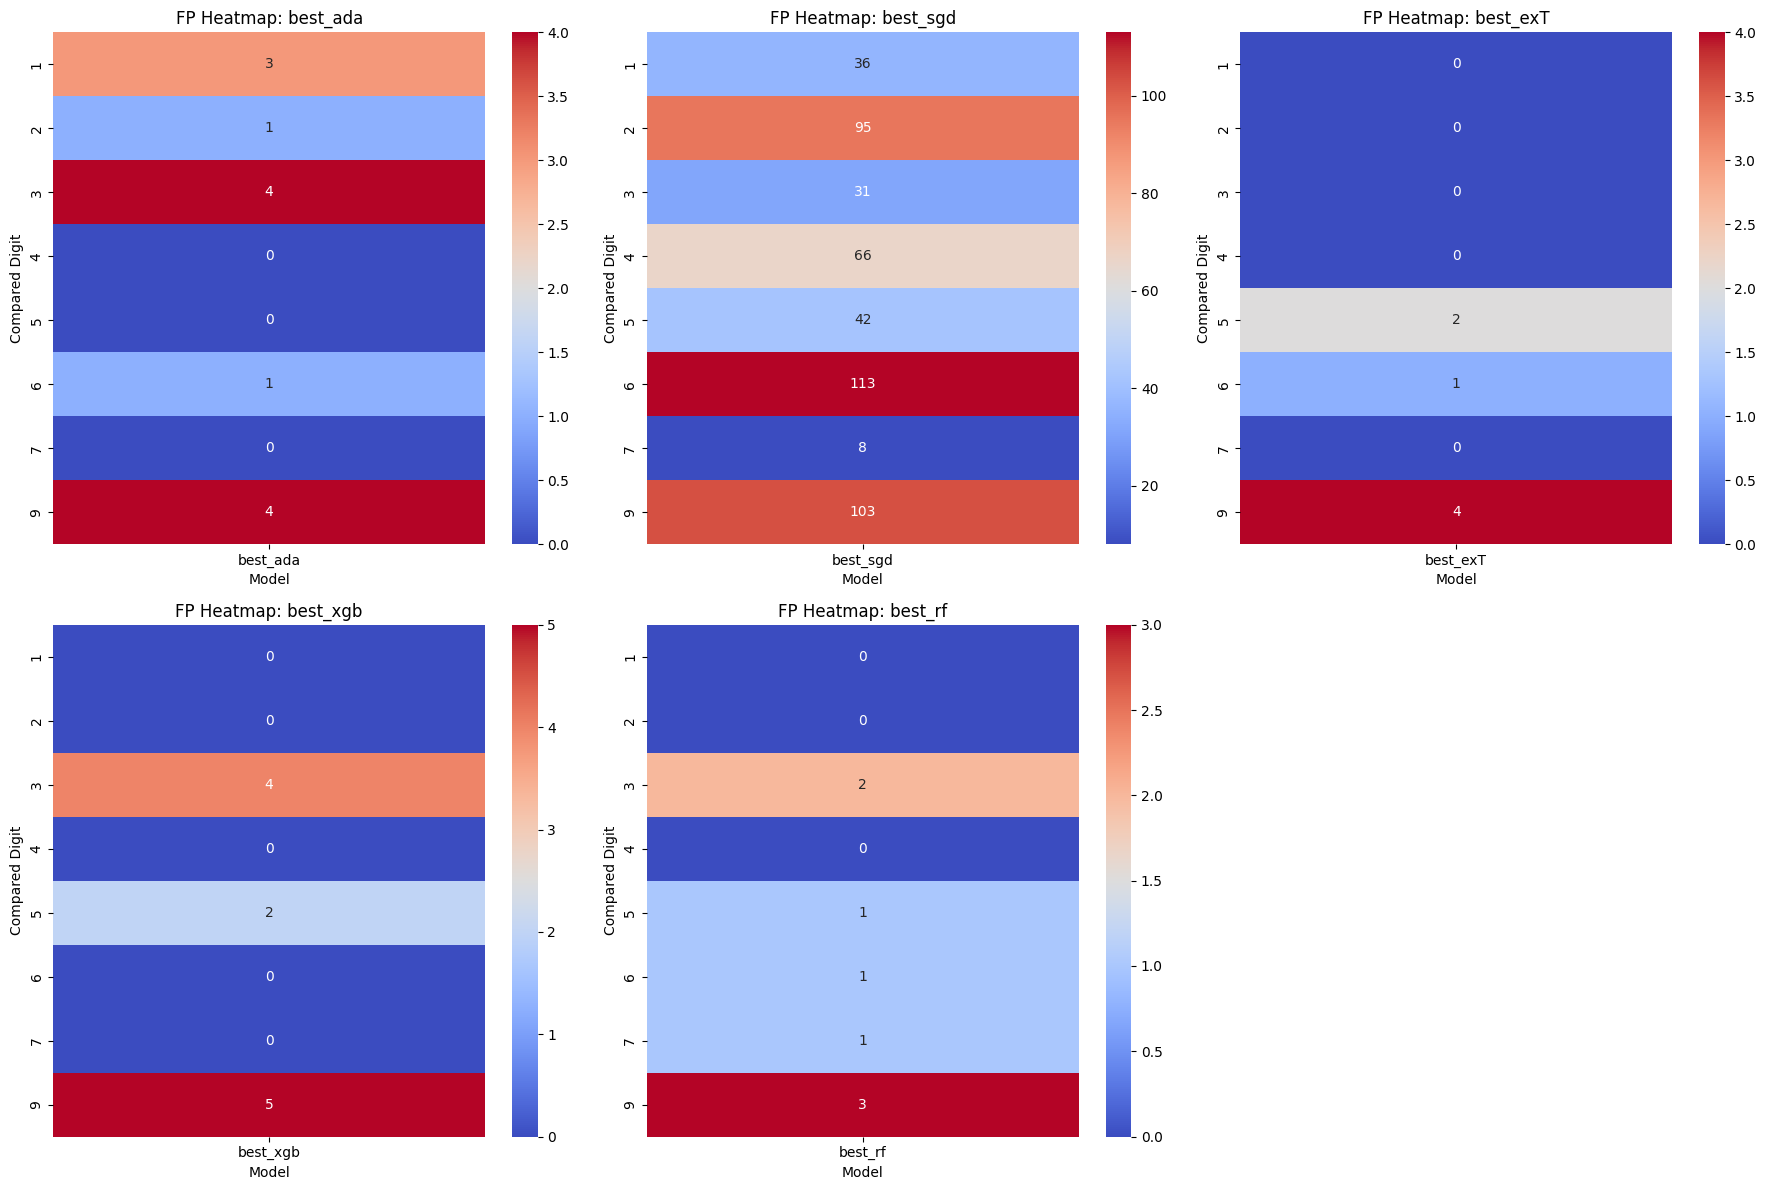

In [100]:
df_results_tuned_models = confusion_heatmap_8_vs_all(best_estimators_dict, validation_X_train, validation_y, class_names, metrics=["FP"])

### 3.4.2.2. True Negative Analysis (TN Heatmaps)
- **High TN Counts Across All Models:**  
  All models correctly classify the majority of non-"8" digits, as shown by the high TN counts across heatmaps. This is expected given the imbalance in the dataset, where non-"8" digits dominate.  

- **SGD's TN Counts:**  
  While still high, SGD's TN counts are slightly lower than those of the tree-based and boosting models. This indicates that linear models are less effective at separating "8" from visually dissimilar digits like "1", "2", and "7".  

- **Tree-Based and Boosting Models:**  
  These models excel at identifying non-"8" digits, achieving near-perfect TN counts for digits like "0", "1", "4", and "7". However, digits like "9" and "3" occasionally challenge even these models, as reflected in their slightly lower TN rates for these classes. 

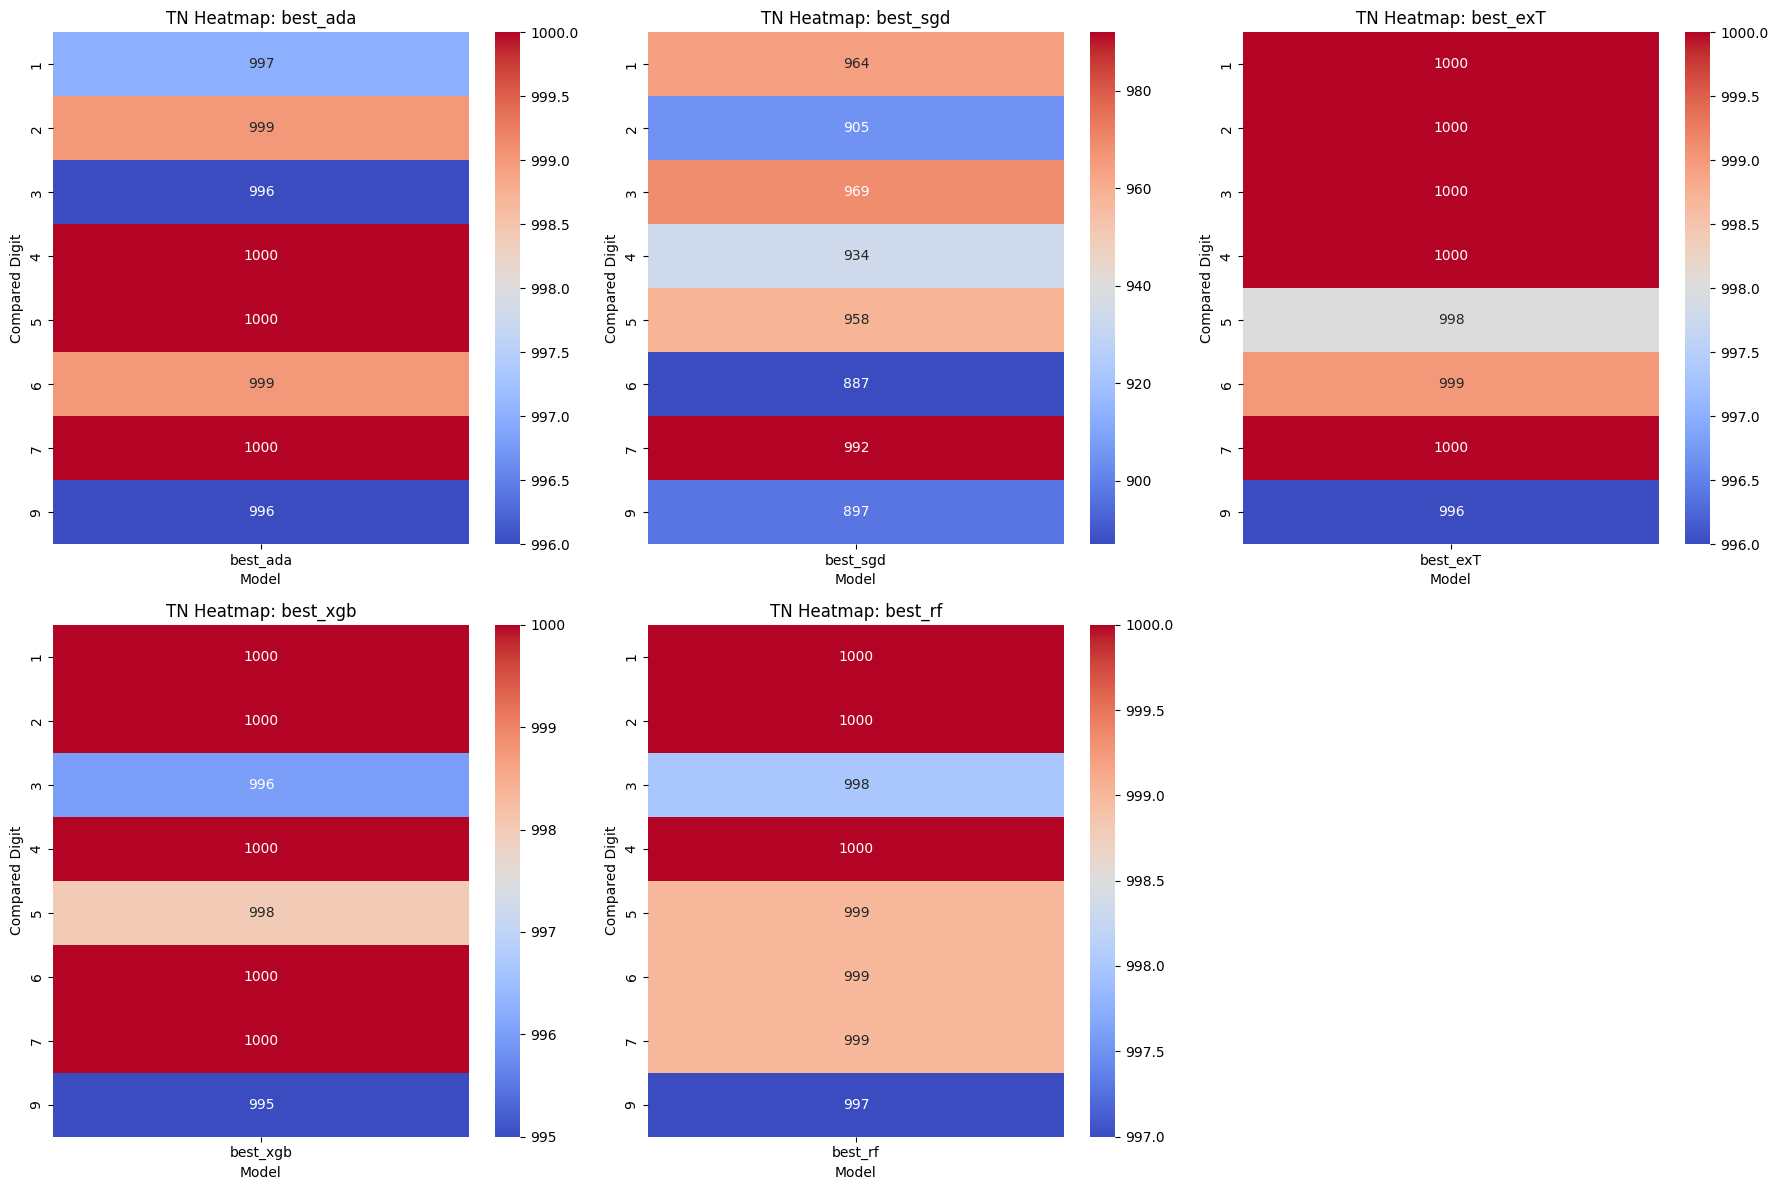

In [101]:
df_results_tuned_models = confusion_heatmap_8_vs_all(best_estimators_dict, validation_X_train, validation_y, class_names, metrics=["TN"])

### 3.4.2.3. Insights into Model Behavior**

These observations provide critical insights into the strengths and weaknesses of the models when distinguishing "8" from other digits. They  can gude targeted improvements using techniques such as:  
1. **Focused preprocessing** to address challenging digits like "9" and "3".  
2. **Enhanced feature engineering** to capture subtle differences between similar digits (specially "9", "3", and "8").  
3. **Additional hyperparameter tuning** to optimize model performance for ambiguous cases.  

## 3.4.3. Identifying and Visualizing Misclassified Digits Images

In [92]:
linear_models = ["best_sgd"]
tree_models = ["best_rf", "best_exT"]
boosting_models = ["best_xgb", "best_ada"]

df_results_missclassified_tuned, misclassified_dict_tuned = compute_misclassified(best_estimators_dict, validation_X_train, validation_y, class_names)

misclassified_groups = analyze_misclassifications(misclassified_dict_tuned, linear_models, tree_models, boosting_models)

n_images_to_visualize = 20

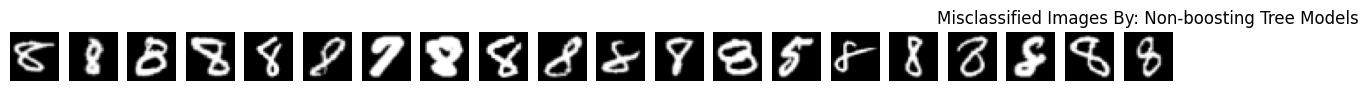

In [103]:
visualize_misclassified_images(
    indices=misclassified_groups["tree_models"], 
    X=np.apply_along_axis(lambda x: x.reshape((28,28)), 1 , validation_X_train), 
    y=validation_y_8, 
    group_name="Non-boosting Tree Models", 
    n=n_images_to_visualize
)

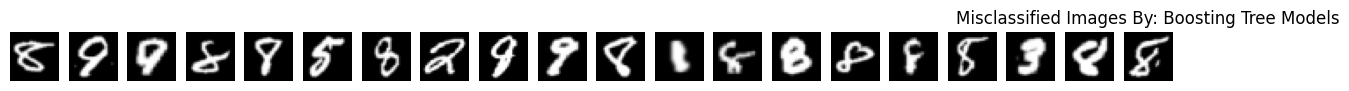

In [104]:
visualize_misclassified_images(
    indices=misclassified_groups["boosting_models"], 
    X=np.apply_along_axis(lambda x: x.reshape((28,28)), 1 , validation_X_train), 
    y=validation_y_8, 
    group_name="Boosting Tree Models",  
    n=n_images_to_visualize
)

#### General Observations
- **Shared Misclassifications**: The leftmost image in both groups of models (boosting and non-boosting) appears consistently misclassified. This might suggest that the image possesses ambiguous or indistinct features, making it inherently challenging for all models to classify correctly. Such cases could highlight dataset limitations or a need for more robust preprocessing or feature engineering.

- **Group-Specific Misclassifications**:
  - **Boosting Models**: The misclassified images by boosting models seem to involve digits with **structural similarities** to others, such as "8" being mistaken for "9." This could be because boosting models emphasize addressing difficult cases during iterative training, which may occasionally lead to overfitting on specific patterns and errors on edge cases.
  - **Non-Boosting Models**: Non-boosting models like Random Forest and Extreme Trees appear to struggle more with images that have **noisy or incomplete strokes.** This might relate to their reliance on random splits and the absence of mechanisms to prioritize refining predictions for misclassified samples, making them more prone to errors when key features are obscured or incomplete.

#### Specific Visual Patterns
- **Boosting Models**: The errors made by boosting models are often on images where strokes are **complete but slightly distorted**, such as an "8" that resembles a poorly drawn "9." Their iterative learning might help them handle ambiguous but complete shapes, but it might also make them sensitive to certain distortions.
- **Non-Boosting Models**: Images with **broken or faint strokes**, like an incomplete "8," tend to be more problematic for non-boosting models. This could stem from the randomness in their design, which might make them less focused on refining predictions for difficult or ambiguous samples.

## 3.4.4. Prediction Reliability Analysis

### 3.4.4.1. Brier Score Evaluation of Best Estimators

The Brier score provides a measure of how well a model's predicted probabilities align with the true outcomes, with lower scores indicating better calibration. Recall that a well-calibrated model means that when a model predicts an image as "8" with a high probability, we can be confident that this probability accurately reflects reality. Poor calibration, as seen in AdaBoost, suggests that while the model might achieve high recall by correctly identifying many "8"s, the confidence associated with these predictions might not always be reliable. In contrast, XGBoost, with its superior calibration, not only excels in prediction metrics but also ensures that its probabilistic outputs are trustworthy.

#### Observations:
- **XGBoost Achieves the Best Calibration:** With a Brier score of **0.0046**, XGBoost demonstrates the most accurate probability estimates among all models. This reflects its ability to provide highly reliable confidence levels in its predictions, enhancing trust in its probabilistic outputs.

- **Tree-Based Models Show Strong Calibration:** Random Forest (**0.0128**) and Extreme Trees (**0.0120**) also exhibit commendable calibration. Their Brier scores suggest that these models can generate reasonably reliable confidence estimates while maintaining their strength in achieving high precision.

- **AdaBoost Exhibits Higher Brier Score:** AdaBoost's Brier score of **0.0972** is notably higher, indicating less calibrated probabilities compared to the other models. This could be a trade-off from its sequential boosting mechanism, which prioritizes correcting misclassifications rather than refining the calibration of predicted probabilities.

#### Business Implications:
The calibration of a model has significant implications depending on the **risk appetite** of the business. For scenarios where **low risk appetite** is a priority, businesses may prioritize models with superior calibration, such as XGBoost or tree-based methods, even if these models exhibit marginally lower recall (compared to AdaBoost) or precision (compared to Random Forest). Such models provide more reliable confidence levels in their probabilistic predictions, thereby reducing the likelihood of making high-confidence but erroneous decisions. Conversely, in scenarios where **maximizing recall or precision** is of greater importance than confidence reliability, models like AdaBoost might still be preferred despite their less calibrated probability outputs. This trade-off highlights the need to align model selection with the business's strategic objectives, balancing predictive performance against the acceptable level of uncertainty and error tolerance inherent to the decision-making process.

Calibrating best_sgd (SGDClassifier)...


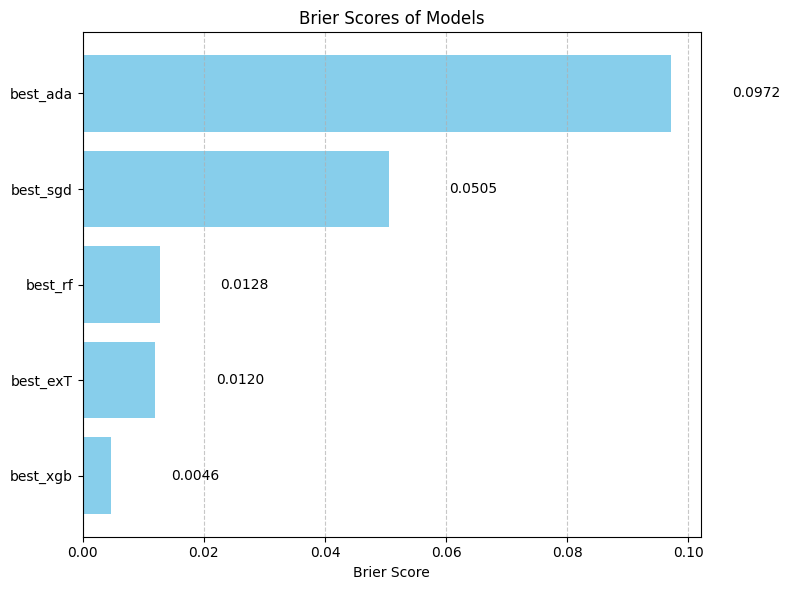

In [107]:
brier_scores_tuned_models = calculate_brier_scores_with_calibration(best_estimators_dict, validation_X_train, validation_y_8)
plot_brier_scores(brier_scores_tuned_models)

## 3.4.4.2. Calibration Analysis

While the Brier score provides a concise and comprehensive measure of a model's probabilistic predictions, it aggregates performance over all probability ranges into a single value. This simplicity, while useful for quick comparisons, masks the finer details of where a model's predictions align well with observed outcomes and where they deviate. 

For example, a model with a low Brier score might still exhibit poor calibration in certain probability ranges, such as systematically underpredicting high-probability outcomes or overpredicting in the middle range. The Brier score cannot reveal such granular insights—it summarizes calibration and sharpness but does not differentiate how these aspects vary across different probability thresholds.

To address this limitation, we turn to the **calibration curve**, a visual diagnostic tool that plots predicted probabilities against observed frequencies of positive outcomes. Unlike the Brier score, which provides a single scalar value, the calibration curve allows us to explore calibration performance across the entire range of predicted probabilities. This detailed view helps identify specific trends, such as overconfidence, underconfidence, or non-linear inconsistencies, that might otherwise go unnoticed.

In the following section, we will delve into calibration curves, discussing their significance, interpretation, and what they reveal about our models in the EMNIST classification task.

### 3.4.4.2.1. Introduction to Calibration Curves

A **calibration curve** is a visual tool used to evaluate the calibration of probabilistic predictions made by a classification model. Calibration measures the alignment between the predicted probabilities of a model and the actual likelihood of an event occurring. For instance, if a model predicts that 80% of samples in a group belong to class 1, we expect around 80% of those samples to truly belong to that class.

#### Significance of Calibration Curves
Calibration curves play an essential role in probability-based decision-making. In scenarios such as medical diagnosis, fraud detection, or risk assessment, well-calibrated probabilities are crucial. Poor calibration may lead to overconfidence in incorrect predictions or underconfidence in correct ones, which could have severe consequences depending on the application.

These curves also extend model evaluation beyond traditional metrics such as accuracy, F1-score, or ROC AUC. While these metrics provide insight into classification performance, they do not assess the reliability of the predicted probabilities. Calibration curves address this gap by offering a direct evaluation of how well the predicted probabilities reflect the true likelihood of outcomes.

Another important utility of calibration curves is identifying whether a model is overconfident or underconfident in its predictions. An overconfident model systematically assigns probabilities that are too high, while an underconfident one consistently predicts probabilities that are too low. Calibration curves provide a clear visual representation of these tendencies.

#### Interpreting Calibration Curves
A perfectly calibrated model aligns with the diagonal line on the curve, known as the 45-degree line. This means that for every predicted probability $p$, the fraction of positive outcomes is also $p$. Deviations from this diagonal indicate calibration issues. 

When the calibration curve lies below the diagonal, the model exhibits overconfidence, predicting probabilities close to 1.0 when the actual fraction of positives is lower. Conversely, if the curve is above the diagonal, the model demonstrates underconfidence, predicting probabilities closer to 0.5 when the actual fraction of positives is higher. Non-linear irregularities in the curve suggest that the model performs poorly at certain probability ranges, signaling a need for recalibration or further optimization.

#### A Reliability Perspective

A machine learning model operates as a component within a larger decision-making system. Calibration curves provide a measurement of the reliability of this component, highlighting its tendency to either act decisively or exhibit hesitancy based on its predictions. A perfectly calibrated system outputs probabilities that align closely with observed outcomes, ensuring high reliability.

Assertive systems tend to overestimate confidence, favoring decisive action, while conservative systems avoid overstatements but risk hesitancy, leading to missed opportunities. These tendencies are visually captured by calibration curves, offering insights into how well the system balances decisiveness and caution.

#### Applications of Calibration Curves

Calibration curves are particularly useful in fields where the reliability of probabilistic predictions is vital. In medical applications, for example, predicting disease probabilities with accurate confidence levels can significantly impact patient outcomes. Similarly, financial institutions rely on well-calibrated models for decisions involving risk and investment. Calibration curves are also critical in multi-class classification tasks where accurate confidence scores for all classes are necessary, such as when interpreting softmax outputs in neural networks.

#### Improving Calibration

When a model demonstrates poor calibration, techniques such as **Platt Scaling** or **Isotonic Regression** can be employed to recalibrate the predicted probabilities. These methods remap the predicted probabilities to better align with the true outcome distribution, thereby improving calibration quality.

With this understanding of calibration curves, we will now analyze the curves generated for our EMNIST dataset, tying the discussion to our project’s goals and highlighting its relevance.

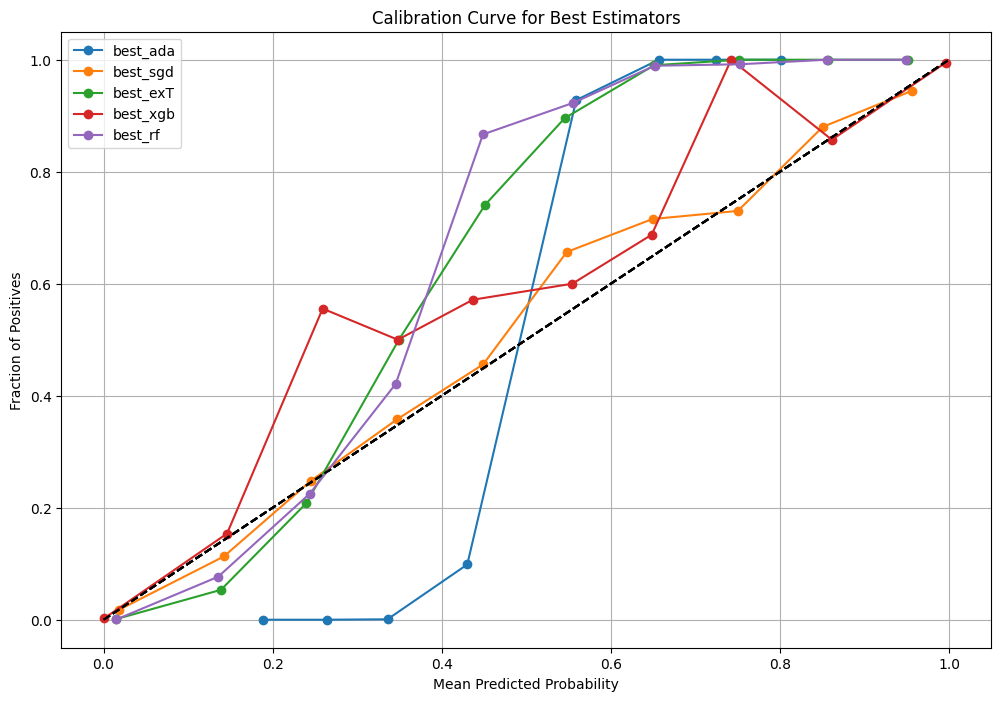

In [108]:
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
import matplotlib.pyplot as plt
import numpy as np

X_val = validation_X_train
y_val = validation_y_8

plt.figure(figsize=(12, 8))

for idx, (model_name, model) in enumerate(best_estimators_dict.items()):
    if isinstance(model, type(SGDClassifier())):
        # for SGDClassifier: Calibrate the model
        calibrated_model = CalibratedClassifierCV(estimator=model, cv='prefit')  # Corrected 'estimator' parameter
        calibrated_model.fit(X_val, y_val)
        prob_pos = calibrated_model.predict_proba(X_val)[:, 1]
    else:
        # for other models: Use predict_proba directly
        prob_pos = model.predict_proba(X_val)[:, 1]
    
    # compute calibration curve
    fraction_of_positives, mean_predicted_value = calibration_curve(y_val, prob_pos, n_bins=10)
    
    # plot calibration curve
    plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label=model_name)
    plt.plot([0, 1], [0, 1], 'k--')  # Perfectly calibrated line

# add labels and legend
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve for Best Estimators")
plt.legend()
plt.grid()
plt.show()

### 3.4.4.2.2. Calibration Curve Analysis: Reliability Perspective

The calibration curves in the diagram illustrate distinct reliability profiles for each model. best_rf and best_exT are **assertive systems**, taking action with high confidence in positive predictions. While they achieve high precision (99%) and strong recall (0.8), their calibration curves reveal a tendency to **overestimate probabilities** in the higher ranges. This reduces their reliability when precise probability estimates are required. Conversely, best_sgd is a **conservative system** that avoids overstating probabilities, resulting in a more calibrated curve. However, this conservatism leads to **hesitancy**, as reflected in its low recall (0.3), indicating frequent missed opportunities to identify positive cases. best_xgb strikes a balance between assertiveness and caution, offering reasonably high recall (0.8) and precision while maintaining good calibration. It is **reliable in high-confidence predictions** but shows slight overconfidence in mid-range probabilities (0.3–0.6).

#### Implications for System Selection

The choice of system depends on the application's need for reliability versus decisiveness. **Assertive systems** like best_rf and best_exT are suitable for scenarios where **actionability is critical**, such as fraud detection or medical diagnosis, but their overconfidence may require calibration adjustments for precise decision-making. **Conservative systems** like best_sgd are more reliable in their probability estimates but risk **missing critical actions** due to hesitancy, making them better suited for environments where false positives carry significant costs. **Balanced systems** like best_xgb offer a middle ground, combining assertiveness and reliability, making them ideal for applications requiring both calibrated probabilities and actionable insights, such as predictive maintenance or customer retention.

**Confidence Intervals and Calibration Assessment** 

While interpreting the calibration curves, it's important to note that slight deviations from the diagonal might not be critical if the confidence intervals around the calibration curve include the diagonal. Incorporating confidence intervals in future evaluations could provide a clearer picture of whether observed miscalibrations are statistically significant or within an acceptable range of uncertainty. This could be particularly useful for fine-tuning models for high-stakes applications.

**Model-Specific Recommendation: AdaBoost** 

AdaBoost performs well in terms of metrics like precision and recall but exhibits notable miscalibration. If this model is to be employed in applications where probabilistic outputs guide decision-making, recalibration methods such as **Platt scaling** or **isotonic regression** could be considered. These techniques can adjust the model's probability estimates to better align with observed outcomes, making it more reliable in contexts where accurate confidence levels are critical.